# MACHINE LEARNING

# ESPECIALIZACION EN DATA SCIENCE

# ULISES JOSÉ BUSTAMANTE MORA

# INTRODUCCIÓN

El presente trabajo tiene como objetivo predecir cambios en la migración de Nueva Zelanda, mediante el uso de datos históricos de dicho país ya con tecnicas de Data Mining aplicadas y enfocando mas a un analisis para la toma de decisiones o predicciones que ayuden a entender el problema.

## Librerias a utilizar

In [1]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## Carga del conjunto de datos

In [2]:
df = pd.read_csv("migration_nz 2.0.csv")
df.head()

,Measure,Country,Citizenship,Year,Value
0,Arrivals,Oceania,New Zealand Citizen,1979,11817.0
1,Arrivals,Oceania,Australian Citizen,1979,4436.0
2,Arrivals,Oceania,Total All Citizenships,1979,19965.0
3,Arrivals,Antarctica,New Zealand Citizen,1979,10.0
4,Arrivals,Antarctica,Australian Citizen,1979,0.0


## Creación de un Linear Regression por año para predecir la cantidad de personas con un filtro de metodo de viaje. Con la metrica del RMSE y el Variance Score

RMSE:  22272.080718992667
Variance Score:  0.08 %


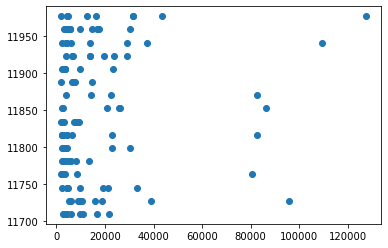

In [3]:
measure_eleccion = "Arrivals" # Arrivals Departures Net
en_los_ultimos = 15 # Si no quieres filtrar por años, poner 38
thresholder_value = 2000


df_mod1 = df.where(df["Measure"] == measure_eleccion).dropna()
df_mod2 = df_mod1.where(df_mod1["Year"] >= max(df_mod1["Year"]-en_los_ultimos)).dropna()
df_mod = df_mod2.where(df_mod2["Value"] >= thresholder_value).dropna()

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error

X_lm = df_mod[["Year"]]
y_lm = df_mod["Value"]
X_train_lm, X_test_lm, y_train_lm, y_test_lm = train_test_split(X_lm, y_lm, test_size=0.30, random_state = 101) 

lm = LinearRegression().fit(X_train_lm,y_train_lm)
lm_pred = lm.predict(X_test_lm)

print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test_lm, lm_pred)))
print("Variance Score: ", round(100*(metrics.explained_variance_score(y_test_lm, lm_pred)),2),"%")
        
plt.scatter(y_test_lm, lm_pred)
plt.show()

## Transformación de variables categóricas a numéricas

In [4]:
citizen_dummies = pd.get_dummies(df["Citizenship"], drop_first=True)
df_with_dummies_1 = pd.concat([df,citizen_dummies], axis=1)
df_with_dummies_1.head()

,Measure,Country,Citizenship,Year,Value,New Zealand Citizen,Total All Citizenships
0,Arrivals,Oceania,New Zealand Citizen,1979,11817.0,1,0
1,Arrivals,Oceania,Australian Citizen,1979,4436.0,0,0
2,Arrivals,Oceania,Total All Citizenships,1979,19965.0,0,1
3,Arrivals,Antarctica,New Zealand Citizen,1979,10.0,1,0
4,Arrivals,Antarctica,Australian Citizen,1979,0.0,0,0


## Creación de un Linear Regression por año y nacionalidad para predecir la cantidad de personas con un filtro de metodo de viaje. Con la metrica del RMSE y el Variance Score

RMSE:  21778.75546193285
Variance Score:  3.69 %


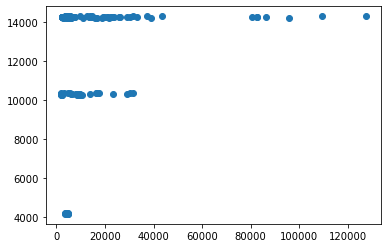

In [5]:
measure_eleccion = "Arrivals" # Arrivals Departures Net
en_los_ultimos = 15 # Si no quieres filtrar por años, poner 38
thresholder_value = 2000

copy_mod = df_with_dummies_1.copy()
copy_mod_1 = copy_mod.where(copy_mod["Measure"] == measure_eleccion).dropna()
copy_mod_2 = copy_mod_1.where(copy_mod_1["Year"] >= max(copy_mod_1["Year"]-en_los_ultimos)).dropna()
copy_mod_3 = copy_mod_2.where(copy_mod_2["Value"] >= thresholder_value).dropna()

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error

X_lm = copy_mod_3[["Year", "Total All Citizenships", "New Zealand Citizen"]]
y_lm = copy_mod_3["Value"]

X_train_lm, X_test_lm, y_train_lm, y_test_lm = train_test_split(X_lm, y_lm, test_size=0.30, random_state = 101) 

lm = LinearRegression().fit(X_train_lm,y_train_lm)
lm_pred = lm.predict(X_test_lm)

print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test_lm, lm_pred)))
print("Variance Score: ", round(100*(metrics.explained_variance_score(y_test_lm, lm_pred)),2),"%")
        
plt.scatter(y_test_lm, lm_pred)
plt.show()

## Creación de un Logistic Regression cantidad de personas tratando de predecir la nacionalidad. Con métricas de Precision, recall y F1 y con una tabla de confución.

In [6]:
measure_eleccion = "Net" # Arrivals Departures Net
en_los_ultimos = 10 # Si no quieres filtrar por años, poner 38
thresholder_value = 500

copy_mod = df_with_dummies_1.copy()
copy_mod_1 = copy_mod.where(copy_mod["Measure"] == measure_eleccion).dropna()
copy_mod_2 = copy_mod_1.where(copy_mod_1["Year"] >= max(copy_mod_1["Year"]-en_los_ultimos)).dropna()
copy_mod_3 = copy_mod_2.where(copy_mod_2["Value"] >= thresholder_value).dropna()

X = copy_mod_3[['Value']]
y = copy_mod_3["Citizenship"]

X = X.replace([np.inf, -np.inf], np.nan).fillna(0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 101) 

from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression().fit(X_train, y_train)
pre = logmodel.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print("Classification Report: ")
print(classification_report(y_test, pre))
print("*******************************")
print("Confusion Matrix: ")
print(confusion_matrix(y_test, pre))

Classification Report: 
                        precision    recall  f1-score   support

    Australian Citizen       0.00      0.00      0.00         7
   New Zealand Citizen       0.00      0.00      0.00         2
Total All Citizenships       0.90      1.00      0.95        79

              accuracy                           0.90        88
             macro avg       0.30      0.33      0.32        88
          weighted avg       0.81      0.90      0.85        88

*******************************
Confusion Matrix: 
[[ 0  0  7]
 [ 0  0  2]
 [ 0  0 79]]


## Transformación de variables categóricas a numéricas

In [7]:
measure_dummies = pd.get_dummies(df["Measure"], drop_first=True)
df_with_dummies_2 = pd.concat([df_with_dummies_1,measure_dummies], axis=1)
df_with_dummies_2.head()

,Measure,Country,Citizenship,Year,Value,New Zealand Citizen,Total All Citizenships,Departures,Net
0,Arrivals,Oceania,New Zealand Citizen,1979,11817.0,1,0,0,0
1,Arrivals,Oceania,Australian Citizen,1979,4436.0,0,0,0,0
2,Arrivals,Oceania,Total All Citizenships,1979,19965.0,0,1,0,0
3,Arrivals,Antarctica,New Zealand Citizen,1979,10.0,1,0,0,0
4,Arrivals,Antarctica,Australian Citizen,1979,0.0,0,0,0,0


## Creación de un Logistic Regression cantidad de personas y el método de viaje tratando de predecir la nacionalidad. Con métricas de Precision, recall y F1 y con una tabla de confución.

In [8]:
en_los_ultimos = 10 # Si no quieres filtrar por años, poner 38
thresholder_value = 500

copy_mod = df_with_dummies_2.copy()
copy_mod_1 = copy_mod.where(copy_mod["Year"] >= max(copy_mod_1["Year"]-en_los_ultimos)).dropna()
copy_mod_2 = copy_mod_1.where(copy_mod_1["Value"] >= thresholder_value).dropna()

X = copy_mod_2[['Value', "Year", "Departures", "Net"]]
y = copy_mod_2["Citizenship"]

X = X.replace([np.inf, -np.inf], np.nan).fillna(0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 101) 

from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression().fit(X_train, y_train)
pre = logmodel.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print("Classification Report: ")
print(classification_report(y_test, pre))
print("*******************************")
print("Confusion Matrix: ")
print(confusion_matrix(y_test, pre))

Classification Report: 
                        precision    recall  f1-score   support

    Australian Citizen       0.00      0.00      0.00        28
   New Zealand Citizen       0.00      0.00      0.00        69
Total All Citizenships       0.73      1.00      0.84       262

              accuracy                           0.73       359
             macro avg       0.24      0.33      0.28       359
          weighted avg       0.53      0.73      0.62       359

*******************************
Confusion Matrix: 
[[  0   0  28]
 [  0   0  69]
 [  0   0 262]]


## Creación de un Random Forest con la cantidad de personas tratando de predecir el país en un n país. Con métricas de Precision, recall y F1 y con una tabla de confución.

In [9]:
paises_elegir = ["Oceania", "Australia"]
en_los_ultimos = 1 # Si no quieres filtrar por años, poner 38
thresholder_value = 5000
n_estimators_preferred = 1000

column_names = ['Measure', 'Country', 'Citizenship', 'Year', 'Value',
       'New Zealand Citizen', 'Total All Citizenships', 'Departures', 'Net']


df_mod_rf = pd.DataFrame(columns=column_names)

for i in paises_elegir:
    df_filter = df_with_dummies_2.where(df_with_dummies_2["Country"] == i).dropna()
    df_mod_rf = pd.concat([df_mod_rf, df_filter])
    

copy_mod = df_mod_rf.copy()
copy_mod_1 = copy_mod.where(copy_mod["Year"] >= max(copy_mod["Year"])-en_los_ultimos).dropna()
copy_mod_2 = copy_mod_1.where(copy_mod_1["Value"] >= thresholder_value).dropna()

X = copy_mod_2[["Value"]]
y = copy_mod_2["Country"]

X_train, X_test, y_train, y_test = train_test_split( X,y, test_size=0.3)

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=n_estimators_preferred)
rfc.fit(X_train, y_train)

pre = rfc.predict(X_test)

print(confusion_matrix(y_test, pre))
print("********************")
print(classification_report(y_test, pre))

[[3 1]
 [2 0]]
********************
              precision    recall  f1-score   support

   Australia       0.60      0.75      0.67         4
     Oceania       0.00      0.00      0.00         2

    accuracy                           0.50         6
   macro avg       0.30      0.38      0.33         6
weighted avg       0.40      0.50      0.44         6



In [10]:
paises_elegir = ["Oceania", "Australia"]
en_los_ultimos = 1 # Si no quieres filtrar por años, poner 38
thresholder_value = 5000
n_estimators_preferred = 1000

column_names = ['Measure', 'Country', 'Citizenship', 'Year', 'Value',
       'New Zealand Citizen', 'Total All Citizenships', 'Departures', 'Net']


df_mod_rf = pd.DataFrame(columns=column_names)

for i in paises_elegir:
    df_filter = df_with_dummies_2.where(df_with_dummies_2["Country"] == i).dropna()
    df_mod_rf = pd.concat([df_mod_rf, df_filter])
    

copy_mod = df_mod_rf.copy()
copy_mod_1 = copy_mod.where(copy_mod["Year"] >= max(copy_mod["Year"])-en_los_ultimos).dropna()
copy_mod_2 = copy_mod_1.where(copy_mod_1["Value"] >= thresholder_value).dropna()

X = copy_mod_2[["Value", 'Year',
       'Departures', 'Net']]
y = copy_mod_2["Country"]

X_train, X_test, y_train, y_test = train_test_split( X,y, test_size=0.3)

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=1000)
rfc.fit(X_train, y_train)

pre = rfc.predict(X_test)

print(confusion_matrix(y_test, pre))
print("********************")
print(classification_report(y_test, pre))

[[0 2]
 [3 1]]
********************
              precision    recall  f1-score   support

   Australia       0.00      0.00      0.00         2
     Oceania       0.33      0.25      0.29         4

    accuracy                           0.17         6
   macro avg       0.17      0.12      0.14         6
weighted avg       0.22      0.17      0.19         6



## Transformación de variables categóricas a numéricas

In [11]:
top5 = ["All countries", "Europe", "Asia", "Oceania", "Australia"]

column_names = ['Measure', 'Country', 'Citizenship', 'Year', 'Value',
       'New Zealand Citizen', 'Total All Citizenships', 'Departures', 'Net']


df_mod_rf = pd.DataFrame(columns=column_names)

for i in top5:
    df_filter = df_with_dummies_2.where(df_with_dummies_2["Country"] == i).dropna()
    df_mod_rf = pd.concat([df_mod_rf, df_filter])

country_dummies = pd.get_dummies(df_mod_rf["Country"], drop_first=True)
df_with_dummies_3 = pd.concat([df_mod_rf,country_dummies], axis=1)
df_with_dummies_3.dropna()
df_with_dummies_3.head()

,Measure,Country,Citizenship,Year,Value,New Zealand Citizen,Total All Citizenships,Departures,Net,Asia,Australia,Europe,Oceania
756,Arrivals,All countries,New Zealand Citizen,1979.0,21445.0,1.0,0.0,0.0,0.0,0,0,0,0
757,Arrivals,All countries,Australian Citizen,1979.0,4869.0,0.0,0.0,0.0,0.0,0,0,0,0
758,Arrivals,All countries,Total All Citizenships,1979.0,40763.0,0.0,1.0,0.0,0.0,0,0,0,0
1515,Departures,All countries,New Zealand Citizen,1979.0,64072.0,1.0,0.0,1.0,0.0,0,0,0,0
1516,Departures,All countries,Australian Citizen,1979.0,4477.0,0.0,0.0,1.0,0.0,0,0,0,0


## Creación de un Linear Regression  predecir la cantidad de personas con un gran conjunto de X. Con la metrica del RMSE y el Variance Score

RMSE:  13833.558150262365
Variance Score:  56.31 %


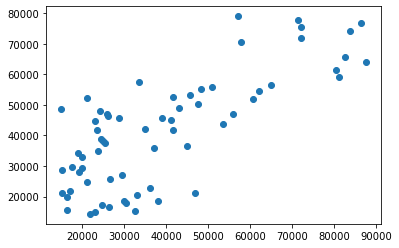

In [12]:
en_los_ultimos = 15 # Si no quieres filtrar por años, poner 38
thresholder_value = 15000

copy_mod = df_with_dummies_3.copy()
copy_mod_1 = copy_mod.where(copy_mod["Year"] >= max(copy_mod["Year"])-en_los_ultimos).dropna()
copy_mod_2 = copy_mod_1.where(copy_mod_1["Value"] >= thresholder_value).dropna()

X_lm = copy_mod_2[["Year","New Zealand Citizen", "Total All Citizenships","Departures",'Net',
       'Asia', 'Australia', 'Europe', 'Oceania']]
y_lm = copy_mod_2["Value"]

X_train_lm, X_test_lm, y_train_lm, y_test_lm = train_test_split(X_lm, y_lm, test_size=0.30, random_state = 101) 

lm = LinearRegression().fit(X_train_lm,y_train_lm)
lm_pred = lm.predict(X_test_lm)

print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test_lm, lm_pred)))
print("Variance Score: ", round(100*(metrics.explained_variance_score(y_test_lm, lm_pred)),2),"%")
        
plt.scatter(y_test_lm, lm_pred)
plt.show()

## Haciendo una estandarizacion de datos para notar si hay una mejora

In [13]:
min_value = df_with_dummies_3["Value"].min()
max_value = df_with_dummies_3["Value"].max()

df_with_dummies_3_Std = df_with_dummies_3.copy()

df_with_dummies_3_Std["Value_Normalized"] = (df_with_dummies_3_Std["Value"] - min_value) / (max_value - min_value)

df_with_dummies_3_Std.head()

,Measure,Country,Citizenship,Year,Value,New Zealand Citizen,Total All Citizenships,Departures,Net,Asia,Australia,Europe,Oceania,Value_Normalized
756,Arrivals,All countries,New Zealand Citizen,1979.0,21445.0,1.0,0.0,0.0,0.0,0,0,0,0,0.377045
757,Arrivals,All countries,Australian Citizen,1979.0,4869.0,0.0,0.0,0.0,0.0,0,0,0,0,0.279500
758,Arrivals,All countries,Total All Citizenships,1979.0,40763.0,0.0,1.0,0.0,0.0,0,0,0,0,0.490726
1515,Departures,All countries,New Zealand Citizen,1979.0,64072.0,1.0,0.0,1.0,0.0,0,0,0,0,0.627892
1516,Departures,All countries,Australian Citizen,1979.0,4477.0,0.0,0.0,1.0,0.0,0,0,0,0,0.277193


## Creación de un Linear Regression predecir la cantidad de personas con un gran conjunto de X estandarizado. Con la metrica del RMSE y el Variance Score

RMSE:  0.08140643404574995
Variance Score:  56.31 %


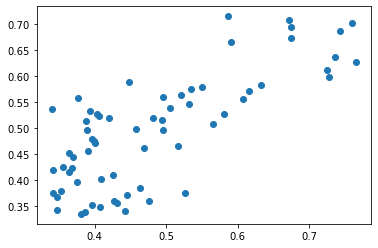

In [14]:
en_los_ultimos = 15 # Si no quieres filtrar por años, poner 38
thresholder_value = 15000

copy_mod = df_with_dummies_3_Std.copy()
copy_mod_1 = copy_mod.where(copy_mod["Year"] >= max(copy_mod["Year"])-en_los_ultimos).dropna()
copy_mod_2 = copy_mod_1.where(copy_mod_1["Value"] >= thresholder_value).dropna()

X_lm = copy_mod_2[["Year","New Zealand Citizen", "Total All Citizenships","Departures",'Net',
       'Asia', 'Australia', 'Europe', 'Oceania']]
y_lm = copy_mod_2["Value_Normalized"]

X_train_lm, X_test_lm, y_train_lm, y_test_lm = train_test_split(X_lm, y_lm, test_size=0.30, random_state = 101) 

lm = LinearRegression().fit(X_train_lm,y_train_lm)
lm_pred = lm.predict(X_test_lm)

print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test_lm, lm_pred)))
print("Variance Score: ", round(100*(metrics.explained_variance_score(y_test_lm, lm_pred)),2),"%")
        
plt.scatter(y_test_lm, lm_pred)
plt.show()

# Código para una regresion logistica con los paises mas populares

In [15]:
en_los_ultimos = 10 # Si no quieres filtrar por años, poner 38
thresholder_value = 500

copy_mod = df_with_dummies_3.copy()
copy_mod_1 = copy_mod.where(copy_mod["Year"] >= max(copy_mod_1["Year"]-en_los_ultimos)).dropna()
copy_mod_2 = copy_mod_1.where(copy_mod_1["Value"] >= thresholder_value).dropna()

X = copy_mod_2[['Value', "Year", "Departures", "Net", 'Asia', 'Australia', 'Europe', 'Oceania']]
y = copy_mod_2["Citizenship"]

X = X.replace([np.inf, -np.inf], np.nan).fillna(0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 101) 

from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression().fit(X_train, y_train)
pre = logmodel.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print("Classification Report: ")
print(classification_report(y_test, pre))
print("*******************************")
print("Confusion Matrix: ")
print(confusion_matrix(y_test, pre))

Classification Report: 
                        precision    recall  f1-score   support

    Australian Citizen       0.81      1.00      0.89        25
   New Zealand Citizen       0.39      0.34      0.36        35
Total All Citizenships       0.61      0.58      0.60        48

              accuracy                           0.60       108
             macro avg       0.60      0.64      0.62       108
          weighted avg       0.58      0.60      0.59       108

*******************************
Confusion Matrix: 
[[25  0  0]
 [ 5 12 18]
 [ 1 19 28]]


## Creación de un PCA con el conjunto de datos

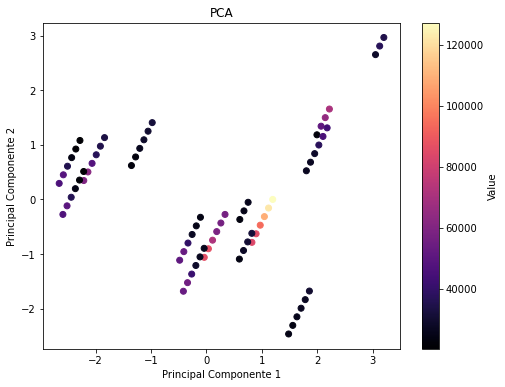

Los variance score son:  [0.30505049 0.14931017]
**********************************************************
Primer componente principal : [ 0.12530861 -0.50895209  0.50895209 -0.43007346  0.29942823  0.32107574
 -0.1783873   0.1806893  -0.15508888]
Segundo componente principal : [ 0.26291989  0.32955048 -0.32955048 -0.13733654  0.48484348  0.42876915
 -0.02106376 -0.45833113 -0.25569019]


In [16]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

en_los_ultimos = 5 # Si no quieres filtrar por años, poner 38
thresholder_value = 20000

copy_mod = df_with_dummies_3.copy()
copy_mod_1 = copy_mod.where(copy_mod["Year"] >= max(copy_mod["Year"])-en_los_ultimos).dropna()
copy_mod_2 = copy_mod_1.where(copy_mod_1["Value"] >= thresholder_value).dropna()

X = copy_mod_2[['Year','New Zealand Citizen', 'Total All Citizenships', 'Departures', 'Net',
       'Asia', 'Australia', 'Europe', 'Oceania']]


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=copy_mod_2['Value'], cmap='magma')
plt.xlabel('Principal Componente 1')
plt.ylabel('Principal Componente 2')
plt.title('PCA')
plt.colorbar(label='Value')
plt.show()


print('Los variance score son: ', pca.explained_variance_ratio_)

print('**********************************************************')

first_pc = pca.components_[0]
second_pc = pca.components_[1]


print('Primer componente principal :', first_pc)
print('Segundo componente principal :', second_pc)

## Creación del grafico de codo sin estandarización para saber cual seria el mejor dato para el K Means

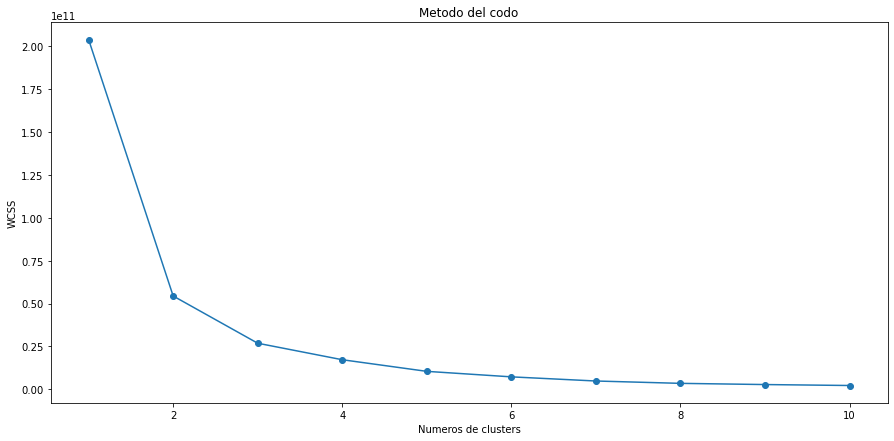

In [28]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

en_los_ultimos = 15 # Si no quieres filtrar por años, poner 38
thresholder_value = 15000

copy_mod = df_with_dummies_3.copy()
copy_mod_1 = copy_mod.where(copy_mod["Year"] >= max(copy_mod["Year"])-en_los_ultimos).dropna()
copy_mod_2 = copy_mod_1.where(copy_mod_1["Value"] >= thresholder_value).dropna()

numeric_df = copy_mod_2[['Year', 'Value',
       'New Zealand Citizen', 'Total All Citizenships', 'Departures', 'Net',
        'Value']]

numeric_df.dropna()

wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(numeric_df)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(15, 7))
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Numeros de clusters')
plt.ylabel('WCSS')
plt.title('Metodo del codo')
plt.show()

## Creación del K Means sin estandarización

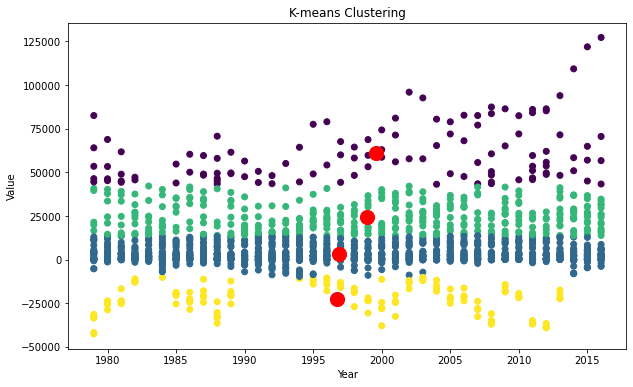

In [27]:
en_los_ultimos = 5 # Si no quieres filtrar por años, poner 38
thresholder_value = 2000

copy_mod = df_with_dummies_3.copy()
copy_mod_1 = copy_mod.where(copy_mod["Year"] >= max(copy_mod["Year"])-en_los_ultimos).dropna()
copy_mod_2 = copy_mod_1.where(copy_mod_1["Value"] >= thresholder_value).dropna()

numeric_df = df_with_dummies_3[['Year', 'Value',
       'New Zealand Citizen', 'Total All Citizenships', 'Departures', 'Net']]

numeric_df.dropna()

kmeans = KMeans(n_clusters=4)
kmeans.fit(numeric_df)
labels = kmeans.labels_
centers = kmeans.cluster_centers_

numeric_df.dropna()

plt.figure(figsize=(10, 6))
plt.scatter(numeric_df['Year'], numeric_df['Value'], c=labels, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], marker='o', s=200, color='red')
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('K-means Clustering')
plt.show()

## Creación del grafico de codo con estandarización para saber cual seria el mejor dato para el K Means

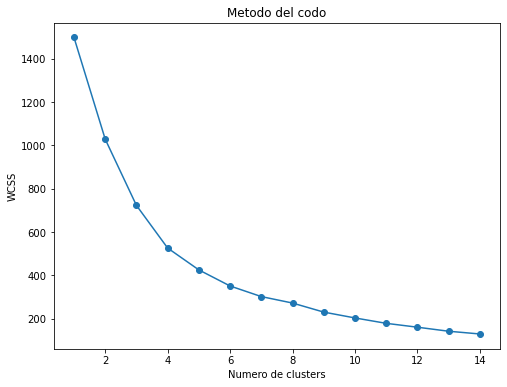

In [29]:
wcss = []
scaler = StandardScaler()
data_scaled = scaler.fit_transform(numeric_df)

for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 15), wcss, marker='o')
plt.xlabel('Numero de clusters')
plt.ylabel('WCSS')
plt.title('Metodo del codo')
plt.show()

## Creación del K Means con estandarización

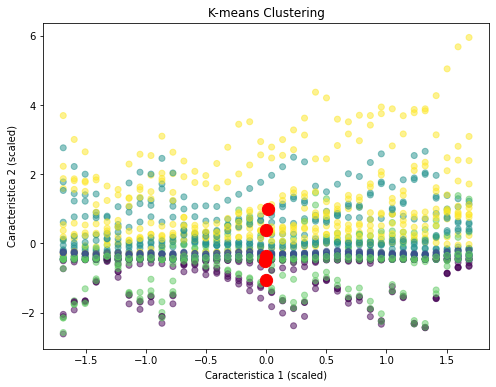

In [25]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(data_scaled)
labels = kmeans.labels_
centers = kmeans.cluster_centers_

plt.figure(figsize=(8, 6))
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=labels, cmap='viridis', alpha=0.5)
plt.scatter(centers[:, 0], centers[:, 1], marker='o', s=150, c='red')
plt.xlabel('Caracteristica 1 (scaled)')
plt.ylabel('Caracteristica 2 (scaled)')
plt.title('K-means Clustering')
plt.show()